In [45]:
import torch
from torch.utils.data import Dataset
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
N_CLASSES = 14
CLASS_NAMES = [ 'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 'Pneumonia',
                'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia']
WIDTH = 224
HEIGHT = 224
CHANNELS = 3
BATCHSIZE = 16 #64*2
IMAGENET_RGB_MEAN = [0.485, 0.456, 0.406]
IMAGENET_RGB_SD = [0.229, 0.224, 0.225]
DATA_DIR = '/home/dattran/data/xray/'

In [3]:
# check the length of NIH training validation and testing set
print('train val size')
!cat train_val_list.csv | wc -l
print('test size')
!cat test_list.csv | wc -l

train val size
76194
test size
19050


/home/dattran/data/xray/00004886_000.png


([], <a list of 0 Text yticklabel objects>)

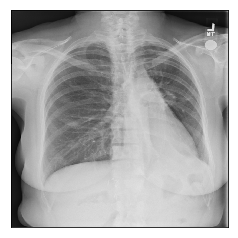

In [44]:
class XrayDataset(Dataset):
    '''
    Get image for train, validate and test base on NIH split
    '''
    
    def __init__(self, 
                 image_list_file='test_list.csv', 
                 transform=None, 
                 percentage=0.01):
        self.data = pd.read_csv(image_list_file, sep=' ', header=None).as_matrix()
        self.transform = transform
        self.percentage = percentage
    
    def __getitem__(self, index):
        image_file = DATA_DIR + self.data[index, 0]
        print(image_file)
        image = Image.open(image_file).convert('RGB')
        label = self.data[index, 1:]
        if self.transform:
            image = self.transform(image)
        return image, torch.FloatTensor(label)
    
    def __len__(self):
        return self.df.shape[0] * self.percentage

In [46]:
class DenseNet121(nn.Module):
    
    def __init__(self, out_size):
        super(DenseNet121, self).__init__()
        self.densenet121 = torchvision.models.densenet121(pretrained=True)
        num_ftrs = self.densenet121.classifier.in_features
        self.densenet121.classifier = nn.Sequential(
            nn.Linear(num_ftrs, out_size),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.densenet121(x)
        return x

net = DenseNet121(N_CLASSES)

In [ ]:
normalize = transforms.Normalize(IMAGENET_RGB_MEAN, IMAGENET_RGB_SD)
transform = transforms.Compose()